<hr>

# ST1511 AI and Machine Learning CA1 Assignment (Regression)
<hr>

Name: Lee Hong Yi <br>
Class: DAAA/FT/2A/05 <br>
Admin Number: p2223010 <br>

__Objective:__ <br>
Predict the price of a house in the United States based on various factors.

__Background Information:__<br>
The price of a house is based on several factors, such as it's location, area, and amenities, such as bedrooms, toilets, and renovation status.

__Additional Information:__ <br>
The demographics of potential buyers can also affect the price of a house.

__Prediction Task:__ <br>
It is defined as attempting to predict the price of a house based on factors such as location, size, and amenities.

__Output Variable:__ <br>
The output variable is the price of the house.

<hr>
<font size = 5>Importing Libraries</font>
<hr>

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, RidgeCV, LogisticRegression, Perceptron, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_percentage_error, make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import ShuffleSplit, GridSearchCV, RandomizedSearchCV, train_test_split, cross_validate, learning_curve


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [71]:
sns.set_theme()

<hr>
<font size = 5> Preparing data.</font> 
<hr><br>

Since the data has already been collected, we can move straight onto preparing the data for training by the model.

In [72]:
original_data = pd.read_csv("./housing_dataset.csv")
analysis_data = pd.DataFrame(original_data.drop(columns = ["Price ($)"]))
target_data = pd.DataFrame(original_data["Price ($)"])
eda_data = original_data.copy()

display(analysis_data.head())
display(target_data.head())

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status
0,0,Chicago,742.0,4,2,3,furnished
1,1,Denver,896.0,4,4,4,furnished
2,2,Chicago,996.0,3,2,2,semi-furnished
3,3,Seattle,750.0,4,2,2,furnished
4,4,New York,742.0,4,1,2,furnished


,Price ($)
0,1330000
1,1225000
2,1225000
3,1221500
4,1141000


In [73]:
eda_data.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


<hr>
<font size = 5>Exploratory Data Analysis (EDA)</font>
<hr><br>
In this section, we will be conducting some EDA in order to allow us to have a better idea of what the data is like.

In [74]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


From the above, we can see that the dataset has 545 rows, with no null values in the dataset.

Displaying the number of each value in a few features.

In [75]:
display(eda_data.value_counts("City"))
display(eda_data.value_counts("No. of Bedrooms"))
display(eda_data.value_counts("No. of Toilets"))
display(eda_data.value_counts("Stories"))

City
New York    158
Seattle     134
Boston      105
Denver       89
Chicago      59
dtype: int64

No. of Bedrooms
3    300
2    136
4     95
5     10
1      2
6      2
dtype: int64

No. of Toilets
1    401
2    133
3     10
4      1
dtype: int64

Stories
2    238
1    227
4     41
3     39
dtype: int64

Generating a graph to show the distribution of factors such as price, size and related features.

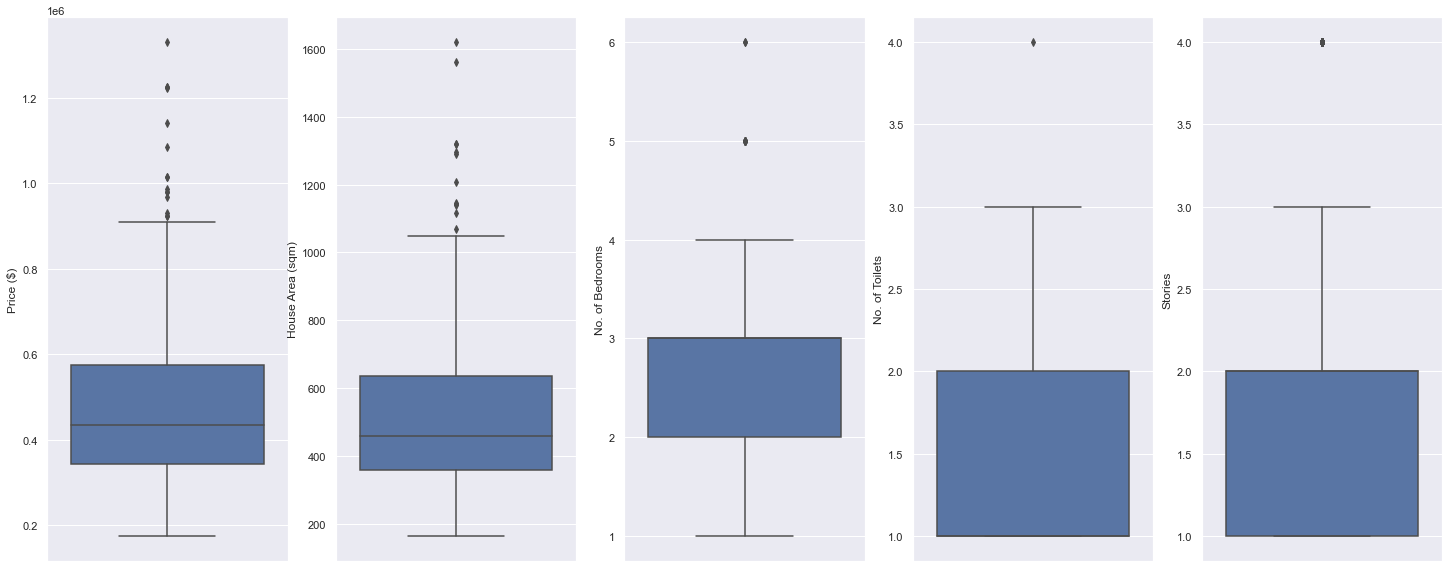

In [76]:
fig, ax = plt.subplots(1,5, figsize = (25,10))

sns.boxplot(data = eda_data, ax = ax[0], y = "Price ($)")
sns.boxplot(data = eda_data, ax = ax[1], y = "House Area (sqm)")
sns.boxplot(data = eda_data, ax = ax[2], y = "No. of Bedrooms")
sns.boxplot(data = eda_data, ax = ax[3], y = "No. of Toilets")
sns.boxplot(data = eda_data, ax = ax[4], y = "Stories")

plt.show()

Plotting a histogram to show the distribution of price per city.

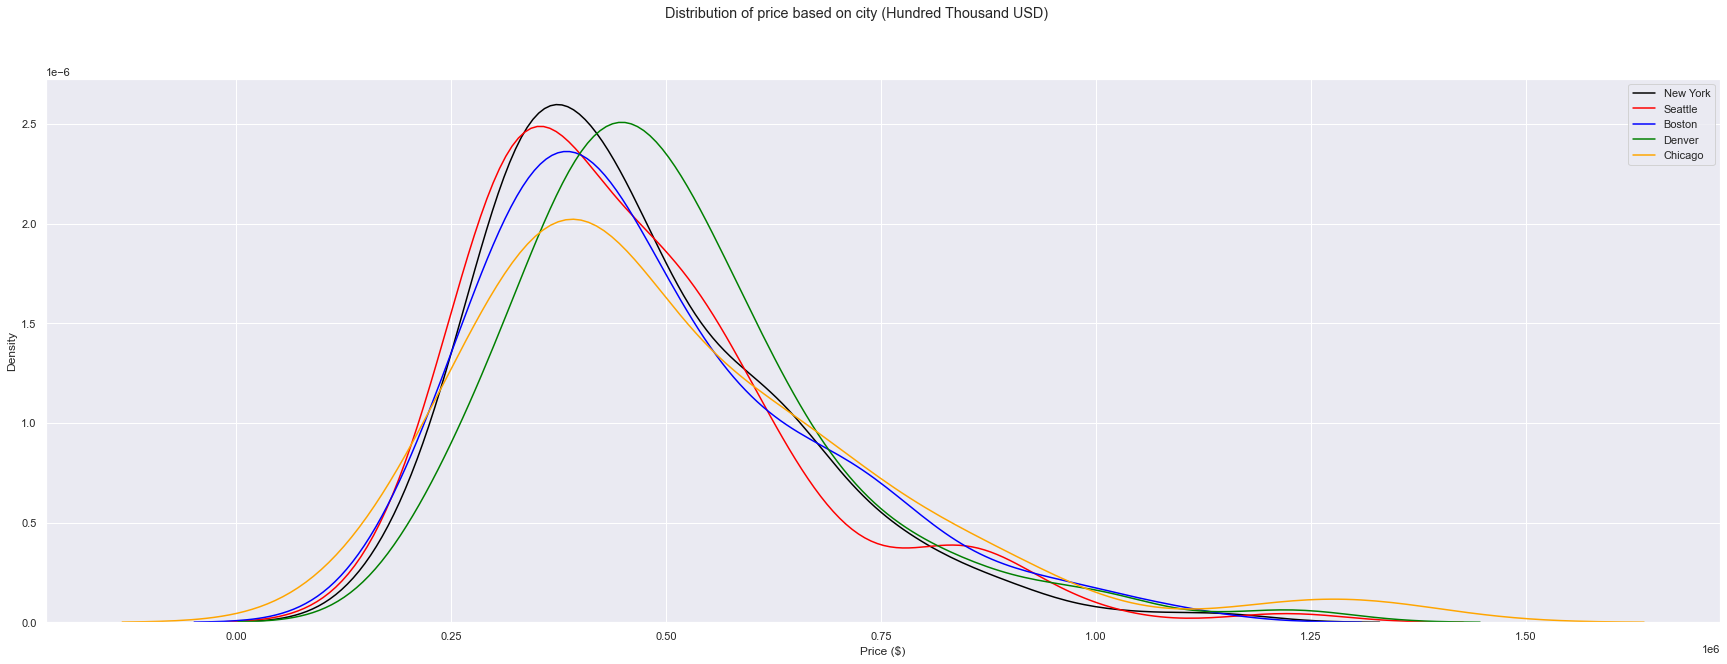

In [77]:
fig, ax = plt.subplots(figsize = (30,10))
fig = sns.kdeplot(data = eda_data[eda_data["City"] == "New York"]["Price ($)"], color = "black", label = "New York")
fig2 = sns.kdeplot(data = eda_data[eda_data["City"] == "Seattle"]["Price ($)"], color = "red", label = "Seattle")
fig3 = sns.kdeplot(data = eda_data[eda_data["City"] == "Boston"]["Price ($)"], color = "blue", label = "Boston")
fig4 = sns.kdeplot(data = eda_data[eda_data["City"] == "Denver"]["Price ($)"], color = "green", label = "Denver")
fig5 = sns.kdeplot(data = eda_data[eda_data["City"] == "Chicago"]["Price ($)"], color = "orange", label = "Chicago")
plt.suptitle("Distribution of price based on city (Hundred Thousand USD)")
ax.legend()
plt.show()


From the above graph, we can see that the city of Denver has houses that are higher on average, as it's price distribution curve is skewed further to the right as compared to the other cities.

Plotting another histogram to show the distribution of house sizes per city.

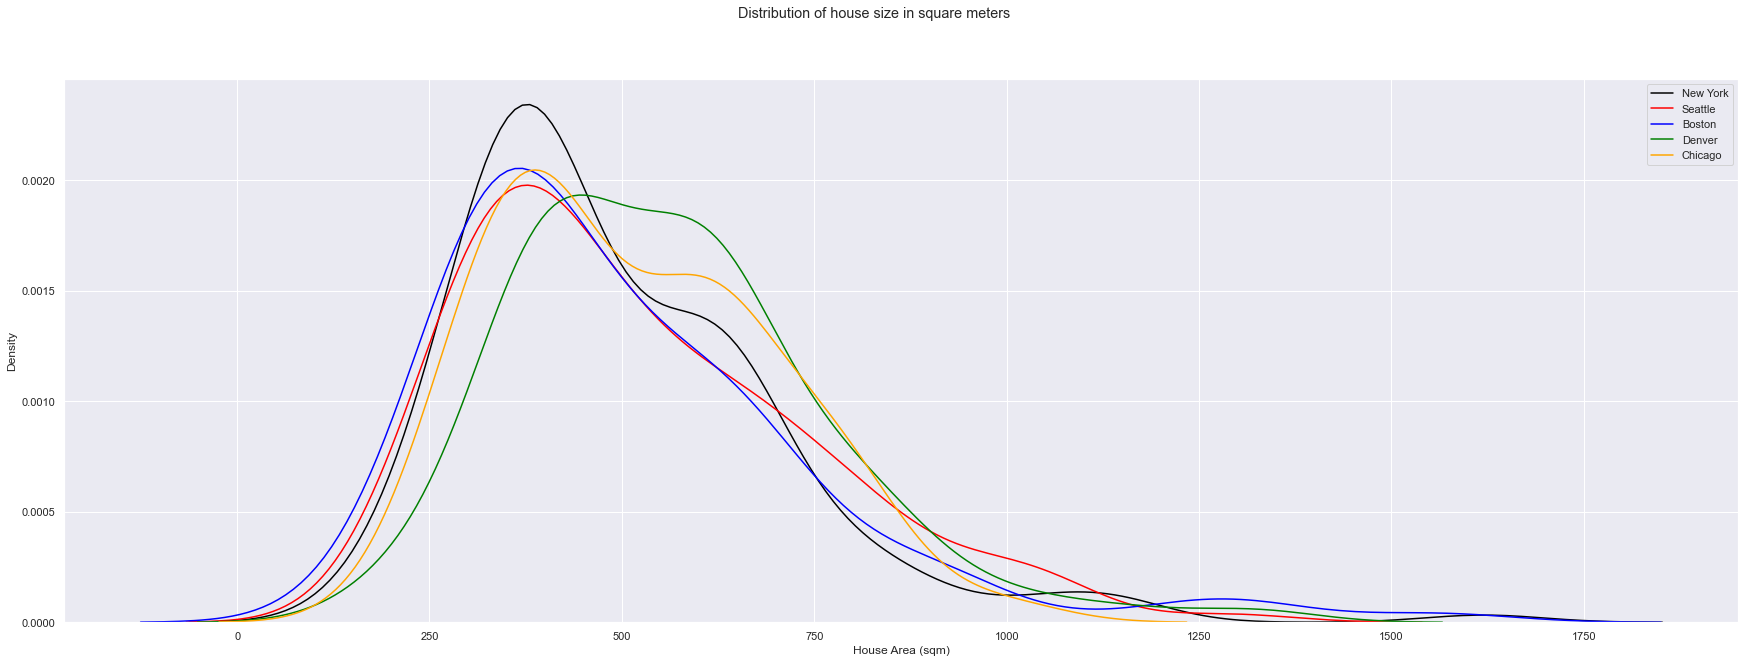

In [78]:
fig, ax = plt.subplots(figsize = (30,10))
fig = sns.kdeplot(data = eda_data[eda_data["City"] == "New York"]["House Area (sqm)"], color = "black", label = "New York")
fig2 = sns.kdeplot(data = eda_data[eda_data["City"] == "Seattle"]["House Area (sqm)"], color = "red", label = "Seattle")
fig3 = sns.kdeplot(data = eda_data[eda_data["City"] == "Boston"]["House Area (sqm)"], color = "blue", label = "Boston")
fig4 = sns.kdeplot(data = eda_data[eda_data["City"] == "Denver"]["House Area (sqm)"], color = "green", label = "Denver")
fig5 = sns.kdeplot(data = eda_data[eda_data["City"] == "Chicago"]["House Area (sqm)"], color = "orange", label = "Chicago")
plt.suptitle("Distribution of house size in square meters")
ax.legend()
plt.show()

From the above graph, we can also see that the city of Denver has houses that are larger on average, as it's distribution curve is skewed further to the right, while also having a lower proportion below ~400sqm as compared to other cities. In addition, the city of New York has more houses that are around 300 sqm, given that the graph has a higher peak at that point on the scale. 

Creating a correlogram to highlight the most correlated variables in the data table.

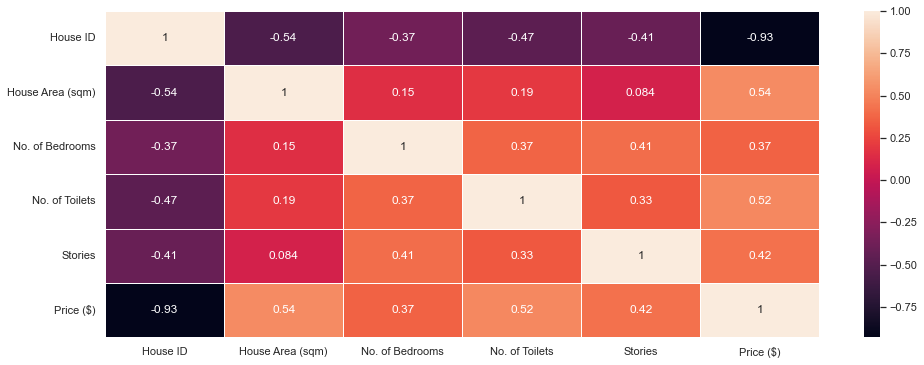

In [79]:
plt.figure(figsize = (16,6))
sns.heatmap(eda_data.corr(), annot = True, linewidths= 0.5)
plt.show()

From the above, we can see that there are no two variables which are strongly correlated. However, something interesting we can observe is that the "House Area (sqm)" variable has a very low correlation with the "Stories" variable, which goes against what we would typically expect.

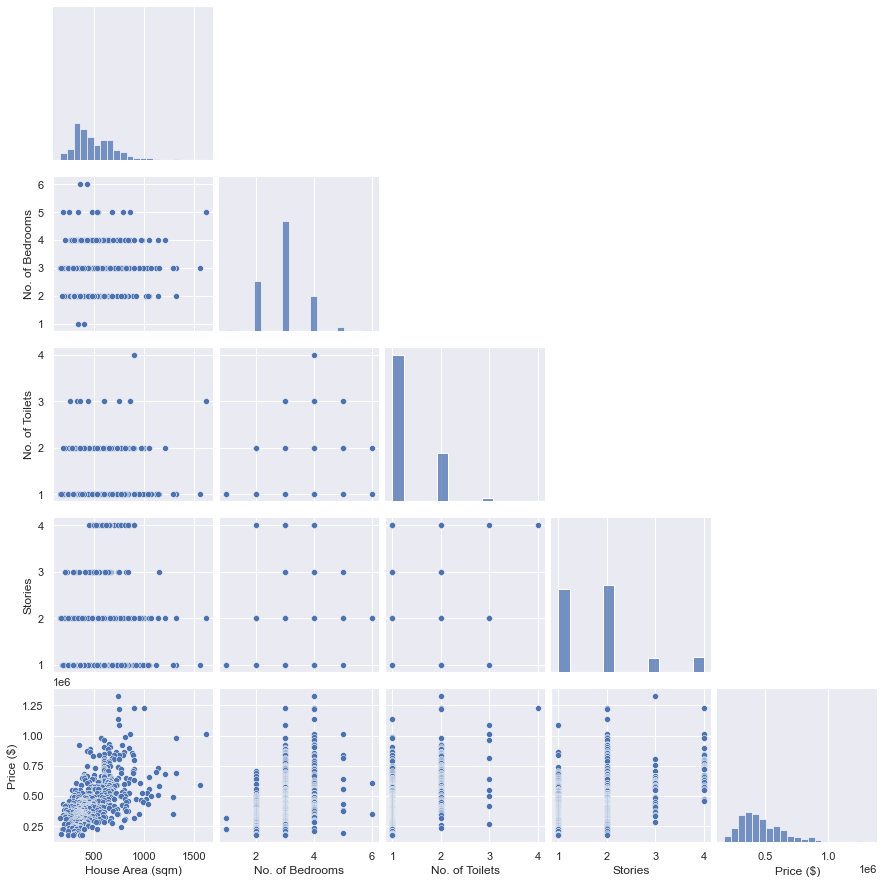

In [80]:
sns.pairplot(eda_data.drop(columns=['House ID']), corner = True)
plt.show()

<hr>
<font size = 5>Feature Engineering</font>
<hr>

In [81]:
area_per_story = []
bedrooms_per_story = []
toilets_per_story = []
bedrooms_per_toilet = []

for i in analysis_data.itertuples():
    area_per_story.append(i[3]/i[6])
    bedrooms_per_story.append(i[4]/i[6])
    toilets_per_story.append(i[5]/i[6])
    bedrooms_per_toilet.append(i[4]/i[5])

analysis_data["area_per_story"] = area_per_story
analysis_data["bedrooms_per_story"] = bedrooms_per_story
analysis_data["toilets_per_story"] = toilets_per_story
analysis_data["bedrooms_per_toilet"] = bedrooms_per_toilet
display(analysis_data.head(10))

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,area_per_story,bedrooms_per_story,toilets_per_story,bedrooms_per_toilet
0,0,Chicago,742.0,4,2,3,furnished,247.333333,1.333333,0.666667,2.000000
1,1,Denver,896.0,4,4,4,furnished,224.000000,1.000000,1.000000,1.000000
2,2,Chicago,996.0,3,2,2,semi-furnished,498.000000,1.500000,1.000000,1.500000
3,3,Seattle,750.0,4,2,2,furnished,375.000000,2.000000,1.000000,2.000000
4,4,New York,742.0,4,1,2,furnished,371.000000,2.000000,0.500000,4.000000
5,5,Boston,750.0,3,3,1,semi-furnished,750.000000,3.000000,3.000000,1.000000
6,6,Denver,858.0,4,3,4,semi-furnished,214.500000,1.000000,0.750000,1.333333
7,7,New York,1620.0,5,3,2,unfurnished,810.000000,2.500000,1.500000,1.666667
8,8,Denver,810.0,4,1,2,furnished,405.000000,2.000000,0.500000,4.000000
9,9,Seattle,575.0,3,2,4,unfurnished,143.750000,0.750000,0.500000,1.500000


Obtaining the columns from the dataset

In [82]:
list_of_features = analysis_data.columns
display(list_of_features)

Index(['House ID', 'City', 'House Area (sqm)', 'No. of Bedrooms',
       'No. of Toilets', 'Stories', 'Renovation Status', 'area_per_story',
       'bedrooms_per_story', 'toilets_per_story', 'bedrooms_per_toilet'],
      dtype='object')

<hr>
<font size = 5>Data Preparation</font>
<hr>

In [83]:
analysis_data = analysis_data.drop(columns = ['House ID'])

analysis_data = pd.get_dummies(analysis_data)
display(analysis_data.head())
X_train, X_test, y_train, y_test = train_test_split(analysis_data, target_data, test_size=0.3, random_state=42)
y_train = np.ravel(y_train, order = 'C')
display(y_train)

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,area_per_story,bedrooms_per_story,toilets_per_story,bedrooms_per_toilet,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,742.0,4,2,3,247.333333,1.333333,0.666667,2.0,0,1,0,0,0,1,0,0
1,896.0,4,4,4,224.000000,1.000000,1.000000,1.0,0,0,1,0,0,1,0,0
2,996.0,3,2,2,498.000000,1.500000,1.000000,1.5,0,1,0,0,0,0,1,0
3,750.0,4,2,2,375.000000,2.000000,1.000000,2.0,0,0,0,0,1,1,0,0
4,742.0,4,1,2,371.000000,2.000000,0.500000,4.0,0,0,0,1,0,1,0,0


array([ 588000,  371000,  364000,  840000,  608300,  476000,  308000,
        524300,  724500,  455000,  857500,  896000,  350000,  693000,
        461300,  434000,  447300,  378000,  630000,  521500,  504000,
        451500,  864500,  266000,  311885,  245000, 1085000,  602000,
        756000,  412300,  409850,  910000,  745500,  490000,  342300,
       1221500,  438200,  385000,  714000,  497000,  238000,  609000,
        371000,  420000,  840000,  462000,  490000,  846300, 1015000,
        521500,  742000,  610750,  798000,  549500,  245000,  595000,
        346500,  602000,  245000,  490000,  525000,  360500,  469000,
        560000,  500500,  336000,  329000,  454300,  420000,  339500,
        265300,  565250,  339500,  689500,  427000,  469000,  525000,
        507500,  399000,  332500,  269500,  503300,  661500,  609000,
        420000,  560000,  640500,  556500,  308000,  315000,  448000,
        427700,  346500,  431900,  619500,  402500,  665000,  378000,
        238000,  595

Using StandardScaler to scale the data.

<hr>
<font size = 5>Model Selection</font>
<hr>

Here, we shall determine which model is best to use to predict the price of the houses, by comparing them to each other using several factors, such as learning curves, f2_scores, and Mean Absolute Percentage Error(MAPE) scores.

We shall use the MAPE scoring metric here, instead of other metrics such as Mean Absolute Error (MAE) or Mean Squared Error (MSE), as it can be hard to understand how big the error is for MAE/MSE as they are compared to the prices of the houses themselves. As the houses typically have 6-figure prices, having a MAE of 1000 may seem quite big, but is only <1% of the actual price. Hence, to help us better understand the size of the error, we use MAPE. It is calculated as follows.
$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{{y_{\text{true}}[i] - y_{\text{pred}}[i]}}{{y_{\text{true}}[i]}} \right| \times 100
$$

In addition, we shall also use the r2 scoring metric to validate the accuracy of the model. The r2 score measures how well a regression model fits to the given data, and provides a indication of the variability of the output variable. The formula is as follows:
$$
\text{R2 score} = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true}}[i] - y_{\text{pred}}[i])^2}{\sum_{i=1}^{n} (y_{\text{true}}[i] - \bar{y}_{\text{true}})^2}
$$





Setting up learning curve and scoring functions for use later.

In [84]:
def plot_learning_curve(model_name, model, X, y, train_sizes, cv, ax, scoring = None):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=cv, scoring = scoring)

    # calculating mean and standard deviation of train and test scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # plotting learning curve
    plt.figure(figsize=(10, 6))
    ax.plot(train_sizes, train_mean, label='Training Score', color='blue', marker = '.')
    ax.plot(train_sizes, test_mean, label='Validation Score', color='red', marker = '.')

    # adding model-specific details to plot
    ax.set_title(f'Learning Curve for {model_name}')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.legend(loc='best')
    ax.grid(True)

def mape_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return mean_absolute_percentage_error(y, y_pred)

def r2_scorer(estimator, X, y):
    y_pred  = estimator.predict(X)
    return r2_score(y, y_pred)

scoring_functions = {
    "mape":make_scorer(mean_absolute_percentage_error),
    "r2":make_scorer(r2_score),
    "mae":make_scorer(mean_absolute_error),
    "mse":make_scorer(mean_squared_error)
}

c:\Users\leeho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\leeho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,fit_time,score_time,test_mape,test_r2,test_mae,test_mse
model,,,,,,
GradientBoostingRegressor,0.032428,0.001545,0.189305,0.477529,88002.260418,15229568062.240070
ElasticNet,0.001867,0.001064,0.199286,0.466467,90741.804422,15815744934.756491
RidgeCV,0.001613,0.001006,0.194153,0.453624,89566.453899,15350520312.371332
Ridge,0.001536,0.001420,0.193107,0.452137,89269.855249,15368812230.889694
LinearRegression,0.001517,0.001311,0.193933,0.446042,89539.162809,15483183732.414371
RandomForestRegressor,0.106729,0.007154,0.198584,0.434824,90706.188120,16320477905.062634
AdaBoostRegressor,0.036241,0.003545,0.225108,0.367784,97963.903598,17399634419.286526
KNeighborsRegressor,0.001306,0.001516,0.218949,0.358808,98701.980383,18779063880.897896
ExtraTreesRegressor,0.081641,0.006130,0.220218,0.289289,101176.713457,19541352117.045963


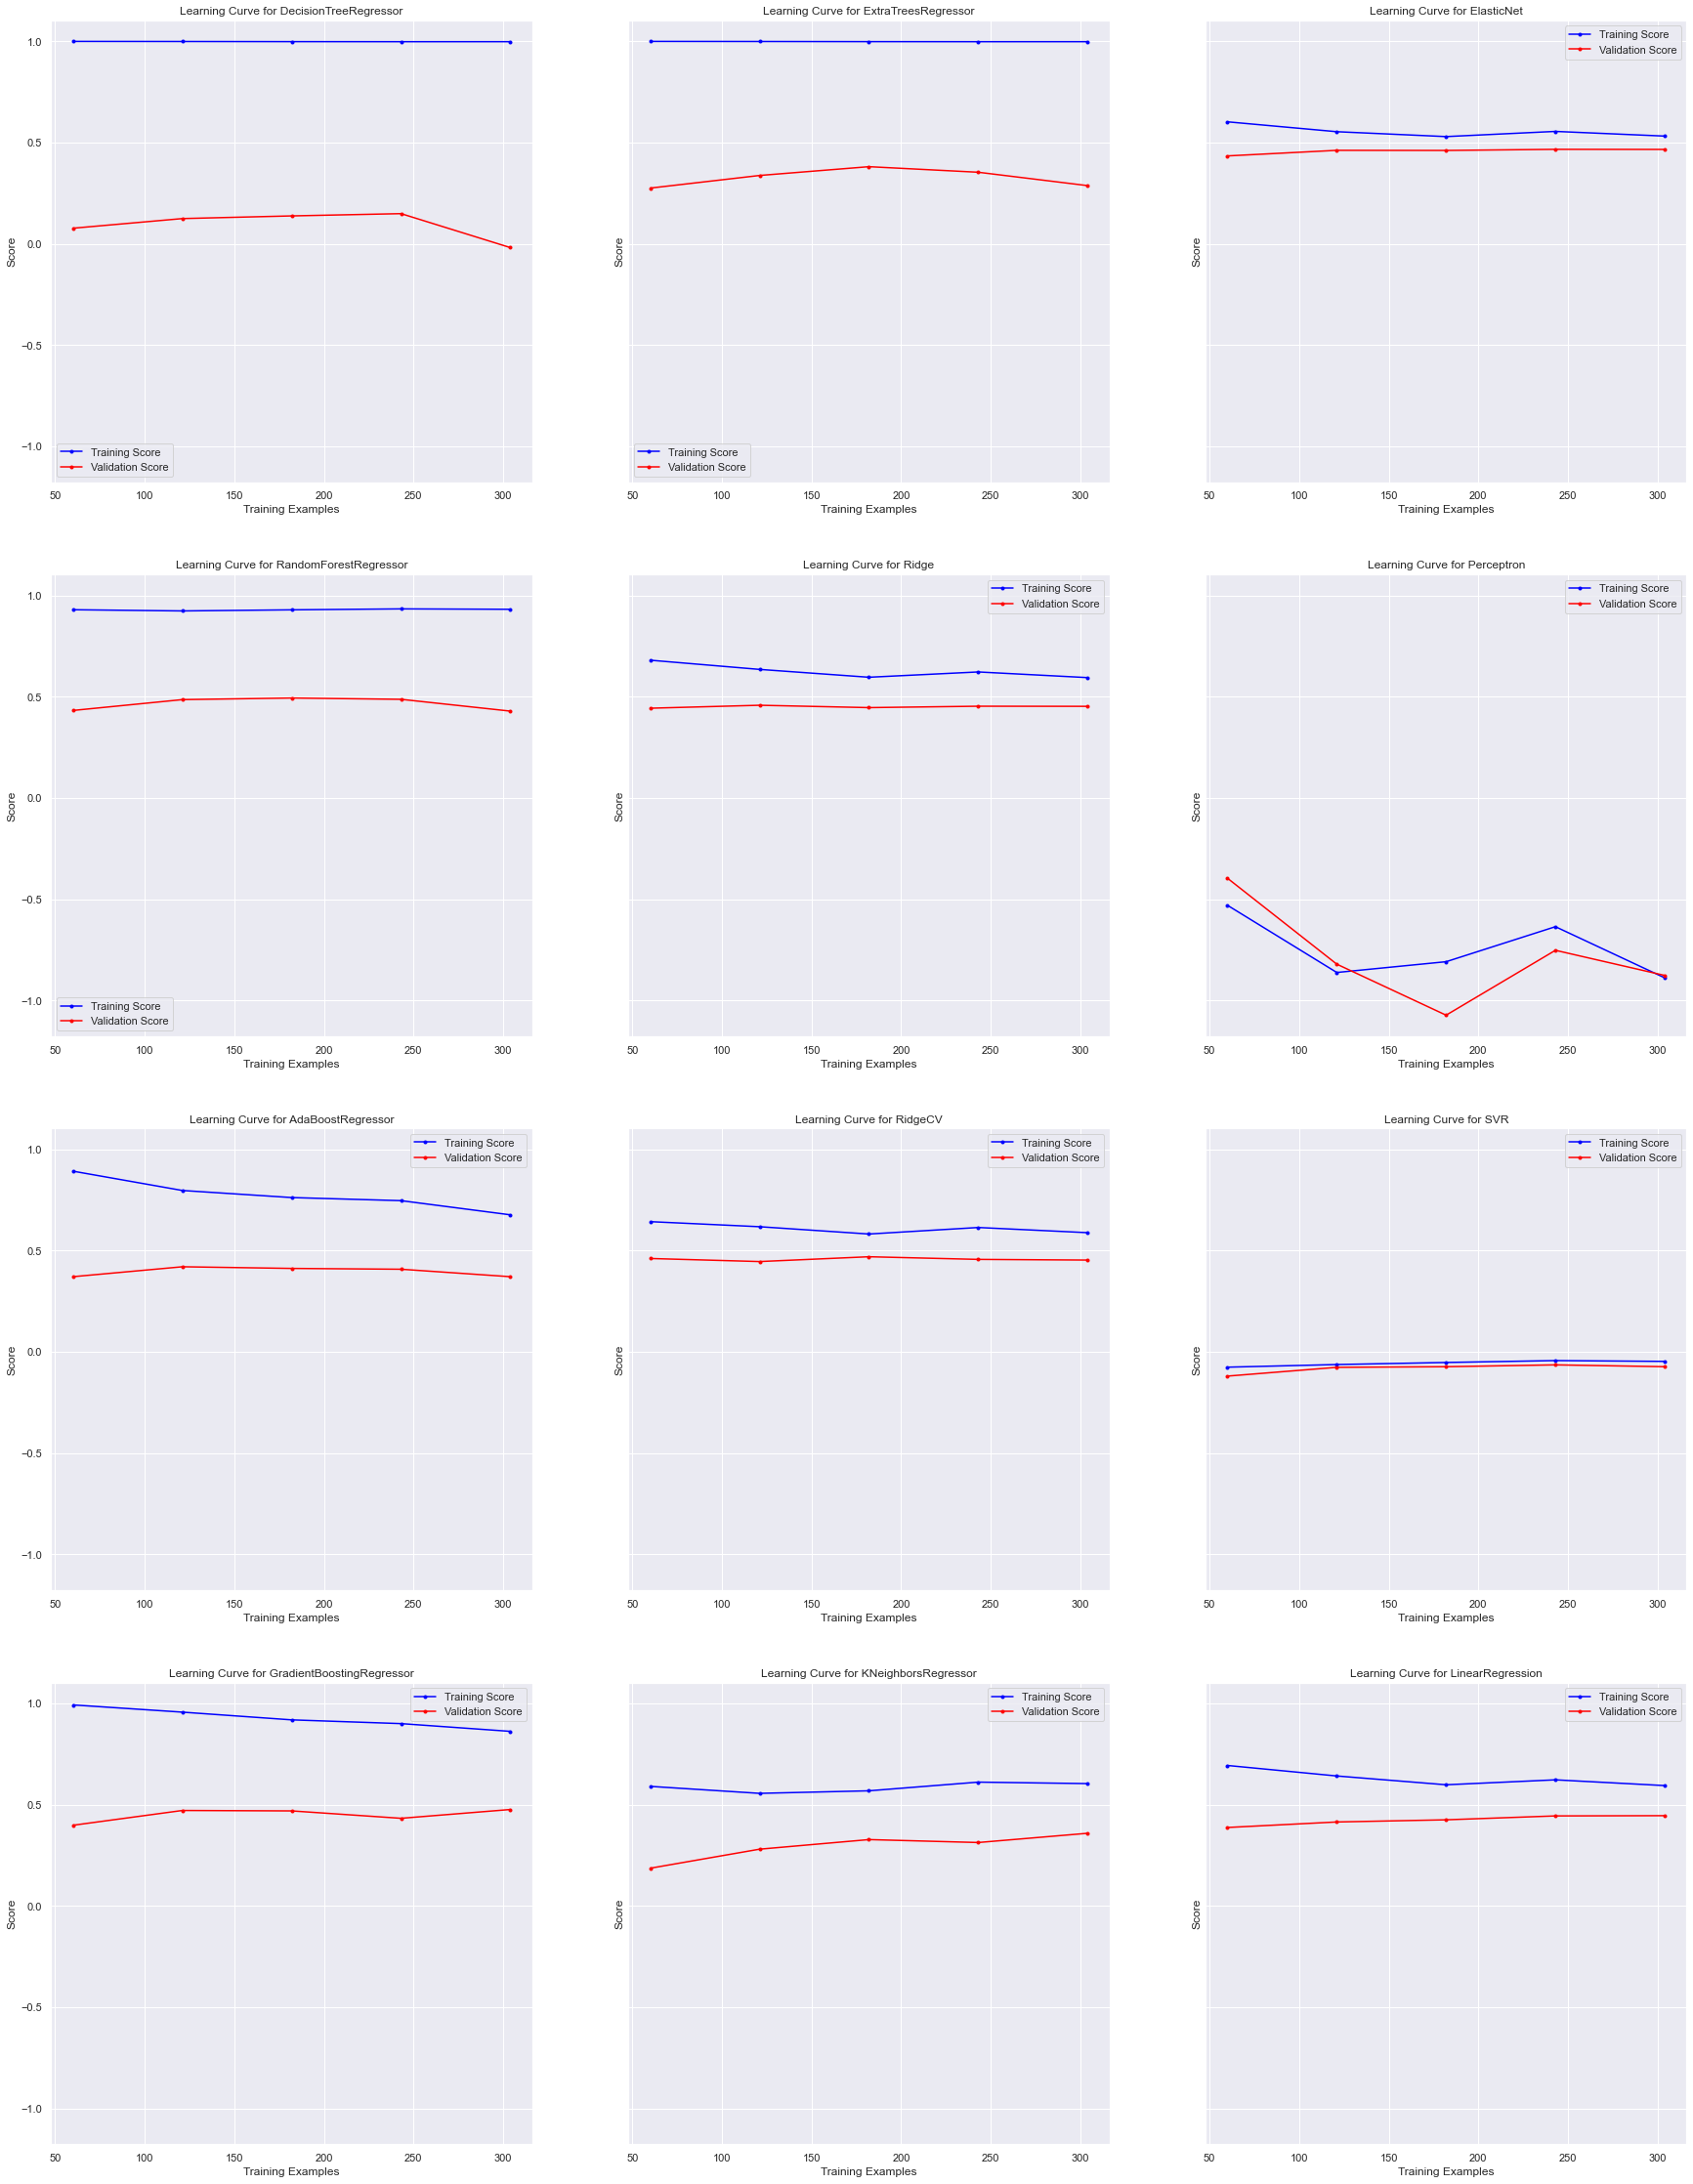

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [85]:
model_score_list = []
cv_model_score_df = pd.DataFrame()
reg_scoring = scoring_functions


models = [
    ("DecisionTreeRegressor", DecisionTreeRegressor()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("AdaBoostRegressor", AdaBoostRegressor()),
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("ExtraTreesRegressor", ExtraTreesRegressor()),
    ("Ridge", Ridge()),
    ("RidgeCV", RidgeCV()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("ElasticNet", ElasticNet()),
    ("Perceptron", Perceptron()),
    ("SVR", SVR()),
    ('LinearRegression',LinearRegression())
]

no_x_plot = 0
no_y_plot = 0
fig, ax = plt.subplots(4, 3, figsize=(30, 40), sharey = True)

#for loop to train all models and plot
for model_name, model in models:
    f1_scores = 0
    model.fit(X_train, y_train)
    model_cv_results = pd.DataFrame(data = cross_validate(model, X_train, y_train, cv = 5, scoring = reg_scoring))
    model_cv_results = pd.DataFrame(model_cv_results.mean(axis = 0)).T
    model_cv_results["model"] = model_name
    cv_model_score_df = cv_model_score_df.append(model_cv_results)
    plot_learning_curve(model_name, model, X_train, y_train, np.linspace(0.2, 1.0, 5), 5, ax = ax[models.index((model_name, model)) % 4, models.index((model_name, model)) // 4], scoring = r2_scorer)

cv_model_score_df = cv_model_score_df.set_index(["model"])
display(cv_model_score_df.sort_values(by = "test_r2", ascending = False).style.background_gradient(cmap = "flare"))
plt.show()


Looking at the dataframe generated, we can see that the GradientBoostingRegressor and ElasticNet models have a high r2 scores, and low MAPE values. Hence, we shall look to finetuning these models, and select one to use as the final model to predict future samples.<br>
However, we can see that there might be mild overfitting for the GradientBoostingRegressor model. We shall now tune the model, and see if the overfitting continues.

<hr>
<font size = 5>Hypertuning Selected Models</font>
<hr>

In this section, we shall use GridSearchCV to identify which parameters allow the model to perform at it's best.

Hypertuning the GradientBoosting model with its given parameters, and identifying which parameters give the best MAPE and r2 score.

In [86]:
learning_rate_arr = list(np.arange(0.1,1,0.1))
for i in list(np.arange(1,10,1)):learning_rate_arr.append(i)
for i in list(np.arange(10,51,10)):learning_rate_arr.append(i)

n_est_arr = list(np.arange(1,51,10))

param_grid = dict(loss=['squared_error', 'absolute_error', 'huber', 'quantile'], learning_rate = learning_rate_arr, n_estimators = n_est_arr, max_depth = list(np.arange(1,10)))
gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(gbr, param_grid = param_grid, return_train_score = False, verbose = 3, n_jobs = -1, scoring = scoring_functions, refit = 'r2', error_score='raise')
gbr_search = gbr_grid.fit(X_train, y_train)

gbr_cv_results = pd.DataFrame(gbr_search.cv_results_)
best_model_results = pd.DataFrame(gbr_cv_results.loc[gbr_search.best_index_])
display(best_model_results)

print(gbr_search.best_params_)
accuracy = gbr_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.4f}%".format(accuracy) )

Fitting 5 folds for each of 4140 candidates, totalling 20700 fits


,546
mean_fit_time,0.006544
std_fit_time,0.001124
mean_score_time,0.003013
std_score_time,0.000897
param_learning_rate,0.4
param_loss,squared_error
param_max_depth,2
param_n_estimators,11
params,"{'learning_rate': 0.4, 'loss': 'squared_error'..."
split0_test_mape,0.166414


{'learning_rate': 0.4, 'loss': 'squared_error', 'max_depth': 2, 'n_estimators': 11}
Accuracy for our training dataset with tuning is : 52.5535%


Hypertuning the ElasticNet model with its given parameters, and identifying which parameters give the best MAPE and r2 score.

In [87]:
param_grid = dict(alpha = np.arange(0.1,2,0.1), l1_ratio = np.arange(0.1,1,0.1), max_iter = np.arange(0,1000,100))
enr = ElasticNet(copy_X = True)
enr_grid = GridSearchCV(enr, param_grid = param_grid, return_train_score= False, verbose = 2, n_jobs = -1, scoring = scoring_functions, refit = 'r2')
enr_search = enr_grid.fit(X_train, y_train)

enr_cv_results = pd.DataFrame(enr_search.cv_results_)
best_model_results = pd.DataFrame(enr_cv_results.loc[enr_search.best_index_])
display(best_model_results)

print(enr_search.best_params_)
accuracy = enr_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.4f}%".format(accuracy) )

Fitting 5 folds for each of 1710 candidates, totalling 8550 fits


c:\Users\leeho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.206e+11, tolerance: 1.197e+09
  model = cd_fast.enet_coordinate_descent(


,1431
mean_fit_time,0.005728
std_fit_time,0.004609
mean_score_time,0.002112
std_score_time,0.000198
param_alpha,1.6
param_l1_ratio,0.9
param_max_iter,100
params,"{'alpha': 1.6, 'l1_ratio': 0.9, 'max_iter': 100}"
split0_test_mape,0.170029
split1_test_mape,0.193859


{'alpha': 1.6, 'l1_ratio': 0.9, 'max_iter': 100}
Accuracy for our training dataset with tuning is : 48.2611%


<hr>
<font size = 5>Evaluating the tuned models.</font>
<hr>

Now, we shall test the models on the unseen test data, and see how they perform. But first, we shall create a dummy baseline model to compare our tuned models to.

In [88]:
dummy_model = DummyRegressor()
dummy_model.fit(X_train, y_train)
dummy_y_test_hat = dummy_model.predict(X_test)

r2_score = r2_score(y_test, dummy_y_test_hat)
mape_score = mean_absolute_percentage_error(y_test, dummy_y_test_hat)

print(f"r2 score for our training dataset using the dummy model is : {r2_score:.4f}")
print(f"MAPE for our training dataset using the dummy model is : {mape_score*100}%")

r2 score for our training dataset using the dummy model is : -0.0000
MAPE for our training dataset using the dummy model is : 39.53613580252018%
